<a href="https://colab.research.google.com/github/Vighnesh95/Earthquake-Forecasting-using-Machine-Learning/blob/main/Earthquake_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                       time  latitude  longitude  depth  mag magType    nst  \
0  2009-12-31T09:57:29.720Z    27.319     91.510   10.0  5.5      mb  205.0   
1  2009-12-29T13:33:22.870Z    35.017     73.005   63.8  4.0      mb   40.0   
2  2009-12-29T09:01:55.310Z    24.357     94.807  124.8  5.6     mwb  206.0   
3  2009-12-28T02:15:04.870Z    30.686     83.769   10.0  4.4      mb   50.0   
4  2009-12-26T00:23:38.570Z    14.001     92.862   42.6  5.0      mb  117.0   

    gap  dmin   rms net          id                   updated  \
0  37.4   NaN  0.89  us  usp000h5j5  2017-04-26T18:09:55.932Z   
1  95.8   NaN  0.94  us  usp000h5fh  2014-11-07T01:40:19.294Z   
2  17.3   NaN  0.77  us  usp000h5f4  2016-11-10T02:22:03.905Z   
3  40.6   NaN  1.08  us  usp000h5e0  2014-11-07T01:40:19.031Z   
4  68.1   NaN  0.82  us  usp000h5c9  2014-11-07T01:40:18.641Z   

                           place        type  horizontalError  depthError  \
0                         Bhutan  earthquake             

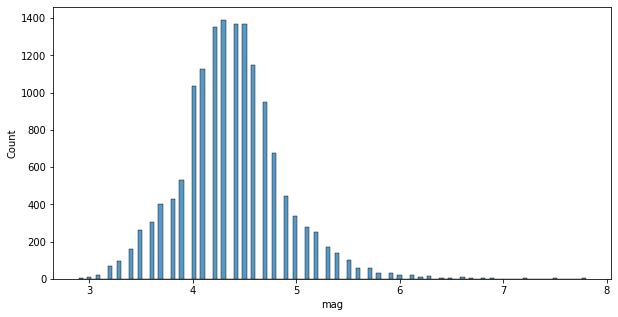

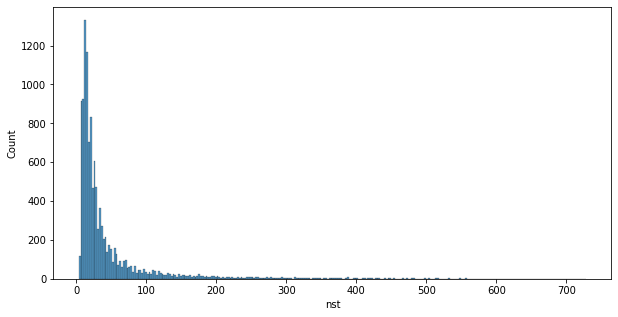

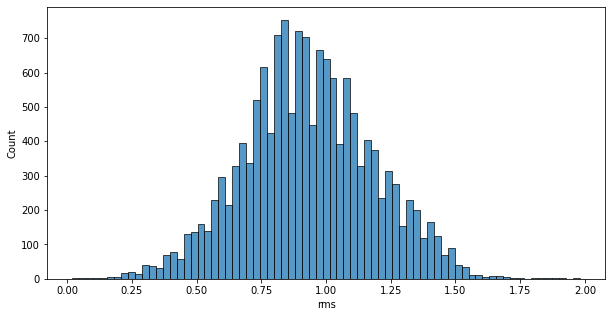

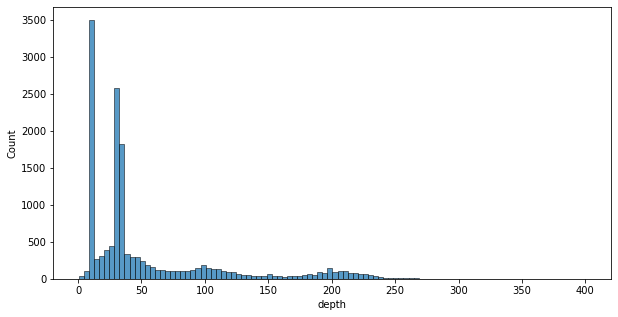

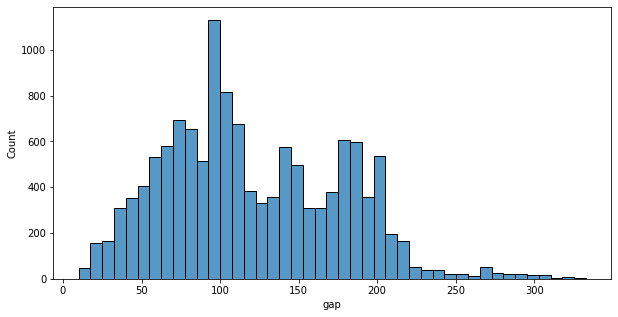

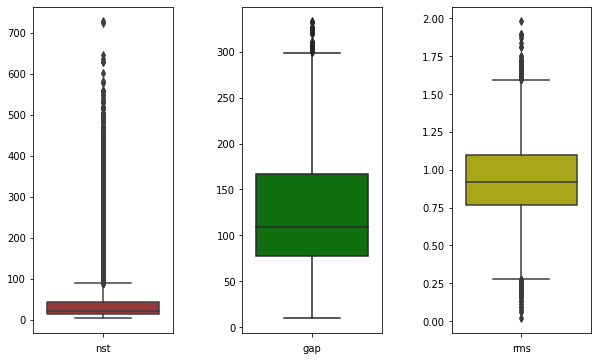

In [ ]:
from numpy.lib.arraysetops import unique
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
import plotly.graph_objs as gg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
import warnings
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plot
import seaborn as sns

# Importing dataset and examining it
dataset = pd.read_csv("/content/Earthquake_dataset.csv")
pd.set_option('display.max_columns', None) # to make sure you can see all the columns in output window
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

# creating our subplot
plt.subplots(figsize=(10, 5))
sns.histplot(x='mag', data=dataset)
plt.show()
plt.subplots(figsize=(10, 5))
sns.histplot(x='nst', data=dataset)
plt.show()
plt.subplots(figsize=(10, 5))
sns.histplot(x='rms', data=dataset)
plt.show()
plt.subplots(figsize=(10, 5))
sns.histplot(x='depth', data=dataset)
plt.show()
plt.subplots(figsize=(10, 5))
sns.histplot(x='gap', data=dataset)
plt.show()

# initialize figure with 3 subplots in a row
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

# draw boxplot for nst in the 1st subplot
sns.boxplot(data=dataset['nst'], ax=ax[0], color='brown',)
ax[0].set_xlabel('nst')

# draw boxplot for gap in the 2nd subplot
sns.boxplot(data=dataset['gap'], ax=ax[1], color='g')
ax[1].set_xlabel('gap')

# draw boxplot for rms in the 3rd subplot
sns.boxplot(data=dataset['rms'], ax=ax[2], color='y')
ax[2].set_xlabel('rms')


# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

dataset['nst'].replace({"":np.nan}, inplace=True)
dataset['nst'].fillna(dataset['nst'].mode().iloc[0], inplace=True)

dataset['gap'].replace({"":np.nan}, inplace=True)
dataset['gap'].fillna(dataset['gap'].mode().iloc[0], inplace=True)

dataset['rms'].replace({"":np.nan}, inplace=True)
dataset['rms'].fillna(dataset['rms'].mode().iloc[0], inplace=True)

import re
lst = []
for i in dataset['place']:
  new = re.sub('^(.*of )',"", i)
  lst.append(new)

set1 = set(lst)
dataset['place'] = lst

df = pd.get_dummies(dataset, columns = ['place'])

X = df.drop(['time','latitude','longitude','mag','magType','dmin','net','id','updated','type','horizontalError','depthError','magError','magNst','status','locationSource','magSource'], axis = 1) 
y= df[['mag']]

# Train test splitting
X_data, X_test, y_data, y_test = train_test_split(X, y,test_size=0.2,random_state=13)

# Creating a validation set
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,test_size=0.2,random_state=13)




In [ ]:
xgb_reg=XGBRegressor(random_state=1)
xgb_reg.fit(X_train,y_train)
xgb_reg.score(X_val,y_val)

[14:37:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6430532290271989

In [ ]:
RF_reg = RandomForestRegressor(n_estimators=150,max_depth=5,min_samples_leaf=3, random_state=13)
RF_reg.fit(X_train, y_train)
RF_reg.score(X_val, y_val)

<ipython-input-20-27c23ca05f5d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_reg.fit(X_train, y_train)


0.5713300722735477

In [ ]:
multi_reg=MultiOutputRegressor(GradientBoostingRegressor(random_state=13,loss='quantile')).fit(X_train, y_train)
multi_reg.score(X_val, y_val)

-0.0037274374600508864

In [ ]:
lgbm_reg= MultiOutputRegressor(LGBMRegressor(random_state=13))
lgbm_reg.fit(X_train,y_train)
lgbm_reg.score(X_val,y_val)

0.6705634061754238

In [ ]:
# Function definition for grid searches over my 4 models: Random Forest Regressor, Gradient Boost Regressor, Light GBM Regressor, and XGB Regressor

def Grid_Search_CV_RFR(X_train, y_train):

        '''Outputs the best parameters and best score of a gridsearch over several RandomForestRegressor hyperparameters.'''

        # Instantiating a Random Forest Regressor
        estimator = RandomForestRegressor(random_state=13)

        # Setting up the parameter grid I wish to test
        param_grid = { 

            'n_estimators'      : [150,200,205,210],
            'max_features'      : ['auto', 'sqrt', 'log2'],
            'min_samples_split' : [18,19,20,21,22,23],
            'bootstrap'         : [True, False],
            }

        # Instatiating the grid search
        grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

        # Fitting Grid search to my data
        grid.fit(X_train, y_train)

        # Returning the best parameters for my data
        return grid.best_params_


def Grid_Search_CV_GBR(X_train, y_train):

        '''Outputs the best parameters and best score of a gridsearch over several Gradient Boost Regressor hyperparameters.'''

        # Instantiating a Gradient Boost Regressor
        estimator = MultiOutputRegressor(GradientBoostingRegressor(random_state=13,criterion='mse',subsample=0.95))

        # Setting up the parameter grid I wish to test
        param_grid = {
             
            'estimator__n_estimators'      : [110,150,180,200,300,400,500,550],
            'estimator__learning_rate'     : [.01,.05,.1,.5],
            'estimator__min_samples_split' : [2,3,4],
            'estimator__min_samples_leaf'  : [3,4,5,6,7],
            'estimator__max_depth'         : [4,5,6,7],
            }

        # Instatiating the grid search
        grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

        # Fitting Grid search to my data
        grid.fit(X_train, y_train)

        # Returning the best parameters for my data
        return grid.best_params_


def Grid_Search_CV_LGBMR(X_train, y_train):

        '''Outputs the best parameters and best score of a gridsearch over several LightGBM Regressor hyperparameters.'''

        # Instantiating a LightGBM Regressor
        estimator = MultiOutputRegressor(LGBMRegressor(random_state=13,subsample=0.95))

        # Setting up the parameter grid I wish to test
        param_grid = {
             
            'estimator__n_estimators'      : [100,110,150,180,200,250,300,350],
            'estimator__learning_rate'     : [.001,.005,.01,.05,.1,.5],
            'estimator__num_leaves'        : [9,10,12,14,16,18,20,22,24,26,28,30,32],
            'estimator__max_depth'         : [2,3,4,5,6],
            }

        # Instatiating the grid search
        grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

        # Fitting Grid search to my data
        grid.fit(X_train, y_train)

        # Returning the best parameters for my data
        return grid.best_params_


def Grid_Search_CV_XGBR(X_train, y_train):

        '''Outputs the best parameters and best score of a gridsearch over several XGBoost Regressor hyperparameters.'''

        # Instantiating a XGBoost Regressor
        estimator = MultiOutputRegressor(XGBRegressor(random_state=13))

        # Setting up the parameter grid I wish to test        
        param_grid = {

             
            'estimator__n_estimators'      : [10,50,100,110,120],
            'estimator__learning_rate'     : [.001,.005,.01,.05,.1,.5],
            'estimator__min_samples_split' : [2,3,4],
            'estimator__min_samples_leaf'  : [1,2,3],
            'estimator__max_depth'         : [2,3,4,5,6,7,8,9],
            }

        # Instatiating the grid search
        grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

        # Fitting Grid search to my data
        grid.fit(X_train, y_train)

        # Returning the best parameters for my data
        return grid.best_params_

In [ ]:
Grid_Search_CV_RFR(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 22,
 'n_estimators': 200}

In [ ]:
my_model_rfr = RandomForestRegressor(bootstrap='True', max_features='auto',min_samples_split=22, n_estimators=200,random_state=13)
my_model_rfr.fit(X_train,y_train)
my_model_rfr.score(X_test,y_test)

<ipython-input-4-ef4fdc07f31d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  my_model_rfr.fit(X_train,y_train)


0.6967681648154922

In [ ]:
y_pred_rfr=my_model_rfr.predict(X_test)
rms = mean_squared_error(y_test, y_pred_rfr, squared=False)
print(rms)

0.2821915456865741


In [ ]:
Grid_Search_CV_LGBMR(X_train, y_train)

{'estimator__learning_rate': 0.1,
 'estimator__max_depth': 5,
 'estimator__n_estimators': 300,
 'estimator__num_leaves': 30}

In [ ]:
my_model_lgbm = MultiOutputRegressor(LGBMRegressor(learning_rate= 0.1, max_depth= 5, n_estimators=300, num_leaves=30))
my_model_lgbm.fit(X_train,y_train)
my_model_lgbm.score(X_test,y_test)

0.7055796384883397

In [ ]:
y_pred_lgbm=my_model_lgbm.predict(X_test)
rms = mean_squared_error(y_test, y_pred_lgbm, squared=False)
print(rms)

0.2780612828218685


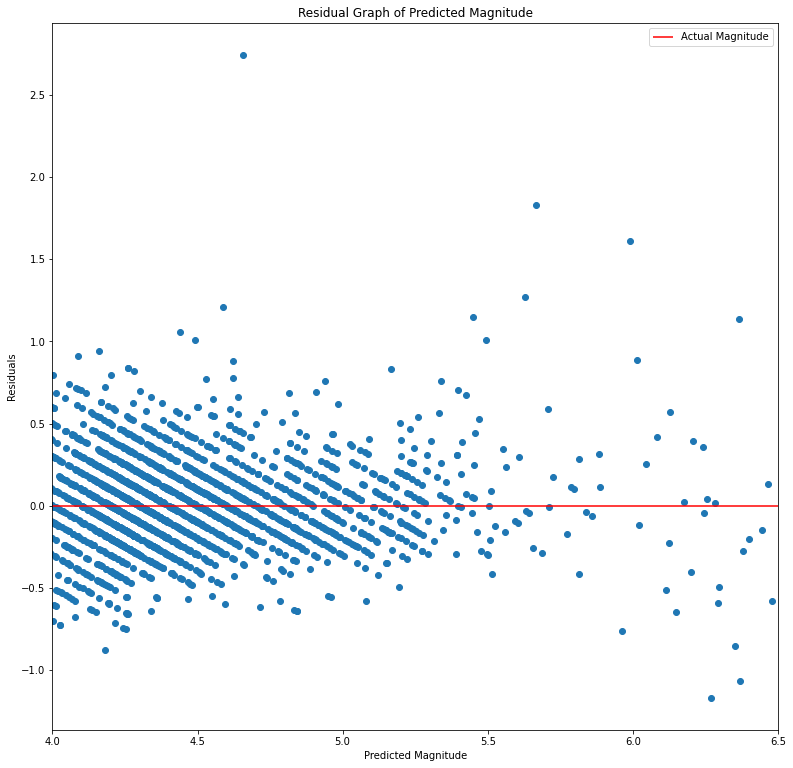

In [ ]:
residuals_lgbm = y_test-y_pred_lgbm

# creating our subplot
plt.subplots(2, 1, figsize=(13, 13))

# Visualizing distributions of residuals of predicted Magnitude on subplot 2
plt.subplot(1, 1, 1)
plt.scatter(y_pred_lgbm[:,0],residuals_lgbm.iloc[:,])
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residuals')
plt.hlines(0,0,7.5,color='r',label='Actual Magnitude')
plt.xlim((4.00,6.5))
plt.title('Residual Graph of Predicted Magnitude')
plt.legend()

plt.show()

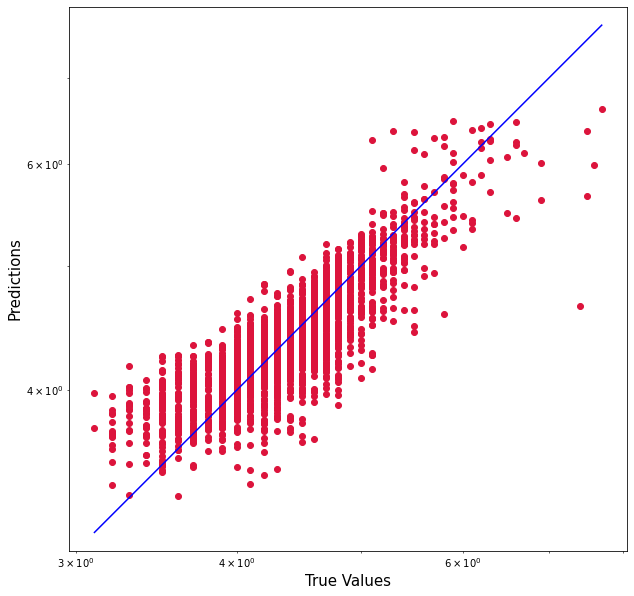

In [ ]:
y_test1 = y_test.values

plt.figure(figsize=(10,10))
plt.scatter(y_test1, y_pred_lgbm, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_lgbm), max(y_test1))
p2 = min(min(y_pred_lgbm), min(y_test1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
# Running a grid search for a XGBoost Regressor
Grid_Search_CV_XGBR(X_train, y_train)

[10:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'estimator__learning_rate': 0.1,
 'estimator__max_depth': 8,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__n_estimators': 110}

In [ ]:
my_model_xgb = MultiOutputRegressor(XGBRegressor(learning_rate= 0.1,max_depth= 8,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 110,random_state=13))
my_model_xgb.fit(X_train,y_train)
my_model_xgb.score(X_test,y_test)

[14:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7021055196341983

In [ ]:
y_pred_xgb=my_model_xgb.predict(X_test)
rms = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(rms)

0.27969701363801247


In [ ]:
# Running a grid search for a Gradient Boost Regressor
warnings.filterwarnings("ignore")
Grid_Search_CV_GBR(X_train, y_train)

{'estimator__learning_rate': 0.05,
 'estimator__max_depth': 6,
 'estimator__min_samples_leaf': 6,
 'estimator__min_samples_split': 2,
 'estimator__n_estimators': 500}

In [ ]:
my_model_gbr = MultiOutputRegressor(GradientBoostingRegressor(learning_rate= 0.05, max_depth= 6, min_samples_leaf= 6, min_samples_split= 2, n_estimators= 500))
my_model_gbr.fit(X_train,y_train)
my_model_gbr.score(X_test,y_test)

0.7037272024032684

In [ ]:
y_pred_gbr=my_model_gbr.predict(X_test)
rms = mean_squared_error(y_test, y_pred_gbr, squared=False)
print(rms)

0.27893437183288533
